#Run all cells Together

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [66]:
global_temp_country = pd.read_csv('D:/data analytics and machine learning project/global temperature/data/GlobalLandTemperaturesByCountry.csv')
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [67]:
global_temp_country.shape

(577462, 4)

In [68]:
global_temp_country.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [69]:
## drop missing data
global_temp_country.dropna(axis='index',how='any', subset=['AverageTemperature'],inplace=True)
global_temp_country.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [70]:
pd.set_option('display.max_rows',243)
global_temp_country.groupby(['Country'])['AverageTemperature'].mean()

Country
Afghanistan                                  14.045007
Africa                                       24.074203
Albania                                      12.610646
Algeria                                      22.985112
American Samoa                               26.611965
Andorra                                      11.201553
Angola                                       21.824549
Anguilla                                     26.610492
Antigua And Barbuda                          26.437924
Argentina                                    14.621194
Armenia                                       8.551648
Aruba                                        27.920390
Asia                                          7.347892
Australia                                    21.624697
Austria                                       6.210732
Azerbaijan                                   11.175936
Bahamas                                      25.128220
Bahrain                                      25.930809
Ba

In [71]:
### Lets check whether there is a duplicate value in country or not

In [72]:
global_temp_country['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [73]:
dict={'Denmark (Europe)':'Denmark',
      'France (Europe)':'France',
      'Netherlands (Europe)':'Netherlands',
      'United Kingdom (Europe)':'United Kingdom',
     'Congo (Democratic Republic Of The)':'Congo'}

In [74]:
global_temp_country['Country']=global_temp_country['Country'].replace(dict)

In [75]:
global_temp_country['Country'].nunique()

237

## Let's calculate average temperature for each country

In [76]:
pd.set_option('display.max_rows',243)
avg_temp=global_temp_country.groupby(['Country'])['AverageTemperature'].mean().to_frame().reset_index()
avg_temp.head()

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965


In [77]:

import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)


In [78]:
fig = px.choropleth(avg_temp,locations='Country',locationmode='country names',color='AverageTemperature')
fig.update_layout(title='Choropleth Map of AverageTemperature ',template="plotly_dark")
fig.show()

<AxesSubplot:xlabel='AverageTemperature', ylabel='Country'>

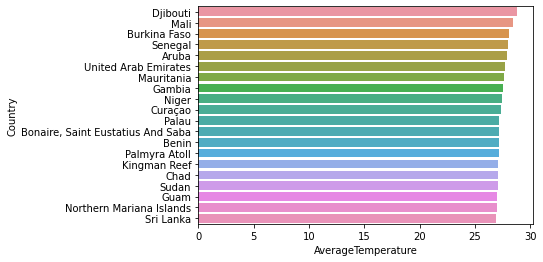

In [79]:
sns.barplot(x=avg_temp.sort_values(by='AverageTemperature',ascending=False)['AverageTemperature'][0:20],y=avg_temp.sort_values(by='AverageTemperature',ascending=False)['Country'][0:20])

In [80]:
global_temp = pd.read_csv("D:/data analytics and machine learning project/global temperature/data/GlobalTemperatures.csv")
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
global_temp['dt'][0].split('-')[0]

'1750'

In [82]:
def fetch_year(date):
    return date.split('-')[0]

In [83]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

In [84]:
global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'})

,LandAverageTemperature,LandAverageTemperatureUncertainty
years,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250
...,...,...
2011,9.516000,0.082000
2012,9.507333,0.083417
2013,9.606500,0.097667


In [85]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [86]:
data['Uncertainty top']=data['LandAverageTemperature']+data['LandAverageTemperatureUncertainty']
data['Uncertainty bottom']=data['LandAverageTemperature']- data['LandAverageTemperatureUncertainty']

In [87]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty top,Uncertainty bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


## Analyse Average temperature in each season

In [88]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [89]:
global_temp.shape

(3192, 10)

In [90]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [91]:
global_temp['month'] = global_temp['dt'].dt.month

In [92]:
global_temp.drop('dt',axis=1,inplace=True)

In [93]:
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [94]:
global_temp.dtypes

LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
month                                          int64
dtype: object

In [95]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

In [96]:
global_temp['season'] = global_temp['month'].apply(get_season)

In [97]:
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [98]:
years=global_temp['years'].unique()

In [99]:
spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    current_yr=global_temp[global_temp['years']==year]
    spring_temps.append(current_yr[current_yr['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_yr[current_yr['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_yr[current_yr['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_yr[current_yr['season'] == 'winter']['LandAverageTemperature'].mean())
    

In [100]:
### lets make a dataframe of it
season=pd.DataFrame()
season['year']=years
season['spring_temp']=spring_temps
season['summer_temp']=summer_temps
season['autumn_temp']=autumn_temps
season['winter_temp']=winter_temps

In [101]:
season.head()

,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [102]:
season.columns

Index(['year', 'spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'], dtype='object')

In [103]:
import plotly.express as px
fig=px.bar(season,y="year",x=['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'],title="Average Temperature in Each season", template="plotly_dark")
fig.show()

In [104]:
continent = ['Russia', 'United States', 'China', 'Japan', 'Australia', 'India']

In [105]:
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [106]:
global_temp_country[global_temp_country['Country'].isin(continent)]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia
...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States
557817,2013-06-01,20.198,0.236,United States
557818,2013-07-01,22.074,0.152,United States
557819,2013-08-01,21.168,0.249,United States


In [107]:
continent_df=global_temp_country[global_temp_country['Country'].isin(continent)]

In [108]:
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia


In [109]:
continent_df.shape

(13598, 4)

In [110]:
continent_df['years']=continent_df['dt'].apply(fetch_year)

In [111]:
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,years
34816,1852-07-01,14.116,1.530,Australia,1852
34817,1852-08-01,15.330,1.400,Australia,1852
34818,1852-09-01,18.740,1.446,Australia,1852
34819,1852-10-01,21.984,1.493,Australia,1852
34820,1852-11-01,24.073,1.466,Australia,1852


In [112]:
continent_df.groupby(['years','Country']).agg({'AverageTemperature':'mean'})

AverageTemperature
years Country                          
1768  United States            5.572750
1769  United States           10.446500
1774  United States            1.603000
1775  United States            9.499167
1776  United States            8.110000
...                                 ...
2013  China                    9.295000
      India                   25.413250
      Japan                   12.964750
      Russia                  -2.263125
      United States           11.297111

[1148 rows x 1 columns]

In [113]:
avg_temp=continent_df.groupby(['years','Country']).agg({'AverageTemperature':'mean'}).reset_index()
avg_temp.head(10)

,years,Country,AverageTemperature
0,1768,United States,5.572750
1,1769,United States,10.446500
2,1774,United States,1.603000
3,1775,United States,9.499167
4,1776,United States,8.110000
5,1777,United States,8.304750
6,1778,United States,5.362000
7,1779,United States,-0.713667
8,1781,United States,6.253250
9,1782,United States,7.606429


In [114]:
import plotly.express as px
fig=px.line(avg_temp,x="years",y=["AverageTemperature"],color='Country',title="Average Land Temperature in World",template="plotly_dark")
fig.show()

## India Map For State Temperatures

In [115]:
import pandas as pd
global_temp_state = pd.read_csv('D:/data analytics and machine learning project/global temperature/data/GlobalLandTemperaturesByState.csv')
global_temp_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [116]:
india=global_temp_state[global_temp_state['Country']=='India']

In [117]:
india.dropna(inplace=True)

In [118]:
india['State'].unique()

array(['Andaman And Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra And Nagar Haveli', 'Daman And Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal'], dtype=object)

In [119]:
state={'Maharashtra (State)':'Maharashtra'}

In [120]:
india['State'].replace(state,inplace=True)

In [121]:
india=india[['AverageTemperature','State']]

In [122]:
india_temp=india.groupby('State')['AverageTemperature'].mean().reset_index()

In [123]:
india_temp.head()

,State,AverageTemperature
0,Andaman And Nicobar,27.231677
1,Andhra Pradesh,27.090003
2,Arunachal Pradesh,13.795670
3,Assam,21.875561
4,Bihar,24.486945


In [124]:
india_temp.shape

(34, 2)

In [125]:
from opencage.geocoder import OpenCageGeocode

In [126]:
key = '5ca89e8267cb476a88cd247f5d0dc35d'  # get api key from:  https://opencagedata.com/api
geocoder = OpenCageGeocode(key)
query = 'Bijuesca, Spain'  
results = geocoder.geocode(query)
print (results)

[{'annotations': {'DMS': {'lat': "41° 32' 25.83312'' N", 'lng': "1° 55' 13.28232'' W"}, 'MGRS': '30TWL9005499324', 'Maidenhead': 'IN91am99nr', 'Mercator': {'x': -213773.074, 'y': 5064053.763}, 'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=342295#map=16/41.54051/-1.92036', 'note_url': 'https://www.openstreetmap.org/note/new#map=16/41.54051/-1.92036&layers=N', 'url': 'https://www.openstreetmap.org/?mlat=41.54051&mlon=-1.92036#map=16/41.54051/-1.92036'}, 'UN_M49': {'regions': {'ES': '724', 'EUROPE': '150', 'SOUTHERN_EUROPE': '039', 'WORLD': '001'}, 'statistical_groupings': ['MEDC']}, 'callingcode': 34, 'currency': {'alternate_symbols': [], 'decimal_mark': ',', 'html_entity': '&#x20AC;', 'iso_code': 'EUR', 'iso_numeric': '978', 'name': 'Euro', 'smallest_denomination': 1, 'subunit': 'Cent', 'subunit_to_unit': 100, 'symbol': '€', 'symbol_first': 0, 'thousands_separator': '.'}, 'flag': '🇪🇸', 'geohash': 'ezqsk61xh2nts1rzhnmu', 'qibla': 106.81, 'roadinfo': {'drive_on': 'right

In [127]:
lat = results[0]['geometry']['lat']
lon = results[0]['geometry']['lng']
print (lat, lon)

41.5405092 -1.9203562


In [128]:
list_lat=[]
list_long=[]
for state in india_temp['State']: # iterate over rows in dataframe
    results = geocoder.geocode(state)   
    lat = results[0]['geometry']['lat']
    lon = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(lon)

In [129]:
# create new columns from lists    

india_temp['lat'] = list_lat   
india_temp['lon'] = list_long

In [130]:
india_temp.head()

,State,AverageTemperature,lat,lon
0,Andaman And Nicobar,27.231677,10.000105,93.000019
1,Andhra Pradesh,27.090003,15.924091,80.186381
2,Arunachal Pradesh,13.795670,28.093770,94.592133
3,Assam,21.875561,26.407384,93.255130
4,Bihar,24.486945,25.644085,85.906508


In [131]:
import folium
from folium.plugins import HeatMap
basemap=folium.Map()

In [132]:
HeatMap(india_temp[['lat','lon','AverageTemperature']],zoom=20,radius=15).add_to(basemap)
basemap

## Analyse Average Temperature Of Major Indian Cities By Month

In [133]:
cities=pd.read_csv('D:/data analytics and machine learning project/global temperature/data/GlobalLandTemperaturesByCity.csv')
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [134]:
cities.shape

(8599212, 7)

In [135]:
India=cities[cities['Country']=='India']

In [136]:
India['City'].unique()

array(['Abohar', 'Achalpur', 'Adilabad', 'Adoni', 'Agartala', 'Agra',
       'Ahmadabad', 'Ahmadnagar', 'Aizawl', 'Ajmer', 'Akola', 'Alandur',
       'Alappuzha', 'Aligarh', 'Allahabad', 'Alwar', 'Ambala',
       'Ambarnath', 'Ambattur', 'Ambur', 'Amravati', 'Amritsar', 'Amroha',
       'Anand', 'Anantapur', 'Ara', 'Asansol', 'Aurangabad', 'Avadi',
       'Azamgarh', 'Badlapur', 'Bagaha', 'Bahadurgarh', 'Baharampur',
       'Bahraich', 'Baidyabati', 'Baleshwar', 'Ballia', 'Bally',
       'Balurghat', 'Banda', 'Bangalore', 'Bangaon', 'Bankura',
       'Bansbaria', 'Barakpur', 'Baranagar', 'Barasat', 'Barddhaman',
       'Bareli', 'Baripada', 'Barnala', 'Barsi', 'Basirhat', 'Basti',
       'Batala', 'Beawar', 'Begusarai', 'Belgaum', 'Bellary', 'Bettiah',
       'Bhadravati', 'Bhadreswar', 'Bhagalpur', 'Bharatpur', 'Bharuch',
       'Bhatpara', 'Bhavnagar', 'Bhilai', 'Bhilwara', 'Bhimavaram',
       'Bhind', 'Bhiwandi', 'Bhiwani', 'Bhopal', 'Bhubaneswar', 'Bhuj',
       'Bhusawal', 'Bid',

In [137]:
Cities=['New Delhi','Bangalore','Hyderabad','Pune','Madras','Varanasi','Gurgaon']

In [138]:
cities=India[India['City'].isin(Cities)]

In [139]:
cities.shape

(18291, 7)

In [140]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
630113,1796-01-01,22.672,2.317,Bangalore,India,12.05N,77.26E
630114,1796-02-01,24.420,1.419,Bangalore,India,12.05N,77.26E
630115,1796-03-01,26.092,2.459,Bangalore,India,12.05N,77.26E
630116,1796-04-01,27.687,1.746,Bangalore,India,12.05N,77.26E
630117,1796-05-01,27.619,1.277,Bangalore,India,12.05N,77.26E


In [141]:
## remove N & E from lat & Lon
cities['Latitude']=cities['Latitude'].str.strip('N')
cities['Longitude']=cities['Longitude'].str.strip('E')

In [142]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
630113,1796-01-01,22.672,2.317,Bangalore,India,12.05,77.26
630114,1796-02-01,24.420,1.419,Bangalore,India,12.05,77.26
630115,1796-03-01,26.092,2.459,Bangalore,India,12.05,77.26
630116,1796-04-01,27.687,1.746,Bangalore,India,12.05,77.26
630117,1796-05-01,27.619,1.277,Bangalore,India,12.05,77.26


In [143]:
cities['dt']=pd.to_datetime(cities['dt'])

In [144]:
cities['Month']=cities['dt'].dt.month
cities.drop('dt',axis=1,inplace=True)

In [145]:
cities.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month
630113,22.672,2.317,Bangalore,India,12.05,77.26,1
630114,24.420,1.419,Bangalore,India,12.05,77.26,2
630115,26.092,2.459,Bangalore,India,12.05,77.26,3
630116,27.687,1.746,Bangalore,India,12.05,77.26,4
630117,27.619,1.277,Bangalore,India,12.05,77.26,5


In [146]:
cities.groupby(['Month','City'])['AverageTemperature'].mean().to_frame()

AverageTemperature
Month City                         
1     Bangalore           22.713981
      Gurgaon             14.238560
      Hyderabad           22.758290
      Madras              24.346733
      New Delhi           14.238560
      Pune                20.448205
      Varanasi            15.596651
2     Bangalore           24.656619
      Gurgaon             17.144980
      Hyderabad           25.317076
      Madras              25.831405
      New Delhi           17.144980
      Pune                22.607924
      Varanasi            18.716421
3     Bangalore           27.062186
      Gurgaon             23.014804
      Hyderabad           28.803543
      Madras              28.114448
      New Delhi           23.014804
      Pune                26.287686
      Varanasi            24.651115
4     Bangalore           27.988517
      Gurgaon             29.004576
      Hyderabad           31.465565
      Madras              30.441304
      New Delhi           29.004576
      Pune                29.004401
      Varanasi            30.190039
5     Bangalore           27.522754
      Gurgaon             33.297051
      Hyderabad           32.702005
      Madras              32.581952
      New Delhi           33.297051
      Pune                29.838203
      Varanasi            33.313519
6     Bangalore           25.468799
      Gurgaon             33.866005
      Hyderabad           29.968469
      Madras              32.142383
      New Delhi           33.866005
      Pune                27.220029
      Varanasi            32.570742
7     Bangalore           24.400481
      Gurgaon             31.174114
      Hyderabad           27.216586
      Madras              30.658619
      New Delhi           31.174114
      Pune                24.724738
      Varanasi            29.612919
8     Bangalore           24.362910
      Gurgaon             29.752423
      Hyderabad           26.573533
      Madras              29.977352
      New Delhi           29.752423
      Pune                24.197833
      Varanasi            28.588162
9     Bangalore           24.495115
      Gurgaon             28.994465
      Hyderabad           26.640239
      Madras              29.397029
      New Delhi           28.994465
      Pune                24.565742
      Varanasi            28.238005
10    Bangalore           24.091785
      Gurgaon             25.866375
      Hyderabad           25.679622
      Madras              27.741679
      New Delhi           25.866375
      Pune                24.367426
      Varanasi            25.771933
11    Bangalore           23.265158
      Gurgaon             20.346510
      Hyderabad           23.508134
      Madras              25.666679
      New Delhi           20.346510
      Pune                22.313670
      Varanasi            20.843502
12    Bangalore           22.290856
      Gurgaon             15.378814
      Hyderabad           21.892538
      Madras              24.168721
      New Delhi           15.378814
      Pune                20.253654
      Varanasi            16.246505

In [147]:
cities_temp=cities.groupby(['Month','City'])['AverageTemperature'].mean().to_frame().reset_index()
cities_temp.columns=['month','City','Mean_temp']
cities_temp.head()

,month,City,Mean_temp
0,1,Bangalore,22.713981
1,1,Gurgaon,14.238560
2,1,Hyderabad,22.758290
3,1,Madras,24.346733
4,1,New Delhi,14.238560


In [148]:
df=cities_temp.merge(cities,on='City',how='left')
df.head()

,month,City,Mean_temp,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,Month
0,1,Bangalore,22.713981,22.672,2.317,India,12.05,77.26,1
1,1,Bangalore,22.713981,24.420,1.419,India,12.05,77.26,2
2,1,Bangalore,22.713981,26.092,2.459,India,12.05,77.26,3
3,1,Bangalore,22.713981,27.687,1.746,India,12.05,77.26,4
4,1,Bangalore,22.713981,27.619,1.277,India,12.05,77.26,5


In [149]:
data=df.drop_duplicates(subset=['month','City'])

In [150]:
data.head()

,month,City,Mean_temp,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,Month
0,1,Bangalore,22.713981,22.672,2.317,India,12.05,77.26,1
2613,1,Gurgaon,14.238560,14.590,2.374,India,28.13,77.27,1
5226,1,Hyderabad,22.758290,22.759,2.322,India,16.87,78.70,1
7839,1,Madras,24.346733,24.252,2.433,India,13.66,80.09,1
10452,1,New Delhi,14.238560,14.590,2.374,India,28.13,77.27,1


In [151]:
data2=data[['month','City','Mean_temp','Country','Latitude','Longitude']]
data2.head()

,month,City,Mean_temp,Country,Latitude,Longitude
0,1,Bangalore,22.713981,India,12.05,77.26
2613,1,Gurgaon,14.238560,India,28.13,77.27
5226,1,Hyderabad,22.758290,India,16.87,78.70
7839,1,Madras,24.346733,India,13.66,80.09
10452,1,New Delhi,14.238560,India,28.13,77.27


In [152]:
trace = go.Heatmap(z=data2['Mean_temp'],
                   x=data2['month'],
                   y=data2['City'],
                  colorscale='Viridis')

In [153]:
data=[trace]
layout = go.Layout(
    title='Average Temperature Of Major Cities By Month',
)

In [154]:
fig = go.Figure(data=data, layout=layout)
fig.show()

## lets try to visualise temperature on a Map

In [155]:
data2.head()

,month,City,Mean_temp,Country,Latitude,Longitude
0,1,Bangalore,22.713981,India,12.05,77.26
2613,1,Gurgaon,14.238560,India,28.13,77.27
5226,1,Hyderabad,22.758290,India,16.87,78.70
7839,1,Madras,24.346733,India,13.66,80.09
10452,1,New Delhi,14.238560,India,28.13,77.27


In [156]:
data2.shape

(84, 6)

In [157]:
import folium
# Create a map
m = folium.Map(tiles='openstreetmap', zoom_start=2)

In [158]:
# Add points to the map
for id,row in data2.iterrows():
    folium.Marker(location=[row['Latitude'],row['Longitude']], popup=row['Mean_temp']).add_to(m)

# Display the map
m

In [159]:
#make a machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


In [160]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data2[['month','City','Mean_temp']], data2['Mean_temp'], test_size=0.2, random_state=0)

In [162]:
#convert X_train from string to float

X_train = X_train.astype(float)
y_train = y_train.astype(float)

#create model
model = LinearRegression().fit(X_train, y_train)
#check the model
model.score(X_test, y_test)
#predict the model
y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'Madras'